In [1]:
%matplotlib inline
import numpy
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

In [31]:
#ICs and parameters
rho_l = 1 #[kg/m**3]
u_l = 0 #[m/s]
p_l = 100 #kN/m**2

rho_r = 0.125 # [kg/m**3]
u_r = 0 #[m/s]
p_r = 10 #kN/m**2

dx = 0.1 #spatial discretization
L_0 = -10 #[m]
L_1 = 10 #[m]
nx = (L_1 - L_0)/dx
s = (3, nx)

u_init = numpy.zeros(s)
u_init[0][:nx/2] = rho_l
u_init[1][:nx/2] = u_l
u_init[2][:nx/2] = p_l

u_init[0][nx/2:] = rho_r
u_init[1][nx/2:] = u_r
u_init[2][nx/2:] = p_r

print(numpy.shape(u_init))

(3, 200)


/home/randy/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:16: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/randy/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:17: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/randy/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:18: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/randy/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/randy/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:21: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/randy/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:22: Deprecati

In [37]:
def computeF(u):
    """Computes flux F = [rho*u, rho*u^2+p, (rho*et+p)*u]
    
    Parameters:
    u- vector of conserved values
    p - pressure
    
    Returns:
    F (array) - Array of Flux at each x. 
    """
    gam = 1.4 #value which is reasonable in air
    F = numpy.empty_like(u)
    F[0] = u[1]
    F[1] = u[1]**2/u[0] + (gam-1)*(u[2] - 0.5*u[1]**2/u[0])
    F[2] = (u[2]+(gam - 1)*(u[2] - 0.5*u[1]**2/u[0]))*u[1]/u[0]
    return F
#

In [38]:
def richtmyer(u, nt, dt, dx, nx):
    """Computes solution with Richtmyer scheme
    Parameters:
        u - vector of conserved quantities
        nt - number of time steps
        dt - time discretization
        dx - spatial discretization
        
    Returns:
        u_n - density after nt time steps at each point x
    """
    
    u_n = numpy.zeros((nt,3, nx))
    print(numpy.shape(u_n))
    u_half = numpy.empty_like(u)
    u_n[:,:] = u.copy()
    u_half = u.copy()
    
    for t in range(1, nt):
        F = computeF(u)
        u_half[:-1] = 0.5*(u[1:] - u[:-1]) - 0.5*dt/dx*(F[1:] - F[:-1])
        Fcorr = computeF(u_half)
        u_n[t, :-1] = u[:-1] + dt/dx*(Fcorr[1:] - Fcorr[:-1])
        u = u_n[t].copy()
    return u_n

In [40]:
dt = 0.0001
T = 0.01
nt = int(T/dt)

u_n = richtmyer(u_init, nt, dt, dx, nx)

(100, 3, 200)


/home/randy/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [56]:
print(numpy.shape(u_n[-1, :, -1]))

(3,)


In [61]:
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

def animate(data):
    x = numpy.linspace(0, T, nx-1)
    y = data
    line.set_data(x,y[-1, :, :])
    return line,

IndexError: too many indices for array

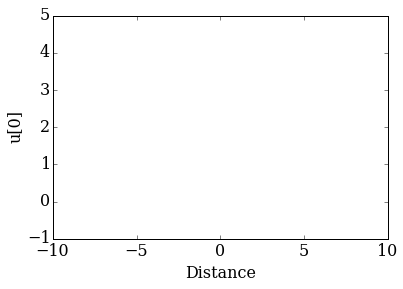

In [62]:
fig = pyplot.figure();
ax = pyplot.axes(xlim=(-10, 10), ylim=(-1, 5),xlabel=('Distance'),ylabel=('u[0]'))
line, = ax.plot([],[],lw=2);

anim = animation.FuncAnimation(fig, animate, frames=u_n, interval=50)
display_animation(anim, default_mode='once')